In [1]:
! pip install sklearn

     |████████████████████████████████| 6.7MB 3.6MB/s eta 0:00:01
     |████████████████████████████████| 296kB 14.6MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=2397 sha256=14144337a2e44b7a9ea10a5b647dd87f8159237f342476ff3d3c4d050d971a56
  Stored in directory: /root/.cache/pip/wheels/76/03/bb/589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn
You should consider upgrading via the 'pip install --upgrade pip' command.


# Imports

In [1]:
from fastai.text import *

In [2]:
import sys

sys.path.append("../../")
from eval.exp.nb_evaluation import *

sys.path.append("../../../")
from src.proc.exp.nb_proc import *
from src.prep.exp.nb_prep import *

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# setup paths and model type
model_path = Path("/tf/data/models")
data_path  = Path("/tf/data/datasets")

task_type = "merged"

# Load Data

In [5]:
df_trn, df_val, df_tst = read_data(data_path/task_type)

In [6]:
bs = 8

Percentage of data to be used: sample 

In [30]:
# data = gen_lm_data(df_trn, df_val, task_type, data_path, sample = 0.30, bs = bs)
data = gen_lm_data(df_trn, df_val, task_type, data_path, bs = bs)
# data.save(task_type + '/data_lm_10pct.pkl')
data.save(task_type + '/data_lm_100pct.pkl')

In [ ]:
# data.save(task_type + '/data_lm_30pct.pkl')

In [9]:
data.label_list

LabelLists;

Train: LabelList (49290 items)
x: LMTextList
▁x x bo s ▁public ▁static ▁process context ▁create random context ( set < string > ▁ act iv ities , ▁int ▁origin ator count , ▁list < string > ▁role s ) ▁{ ▁validate . not null ( act iv ities ); ▁validate . no null elements ( act iv ities ); ▁validate . not negative ( origin ator count ); ▁validate . not null ( role s ); ▁validate . no null elements ( role s ); ▁process context ▁new context ▁= ▁new ▁process context (" random ▁x x ma j ▁context "); ▁new context . set act iv ities ( act iv ities ); ▁list < string > ▁c origin ator s ▁= ▁create subject list ( origin ator count ); ▁new context . set subject s ( new ▁hash set <>( c origin ator s )); ▁/ ▁/ ▁x x ma j ▁create ▁a ▁new ▁access ▁control ▁model . ▁new context . set ac model ( r b ac model . create random model ( c origin ator s , ▁ act iv ities , ▁role s )); ▁return ▁new context ; ▁}<$ comment $> create s ▁a ▁new ▁context ▁using ▁an ▁x x up ▁r b ac ▁access ▁control ▁model . 

In [ ]:
data = load_data(data_path/task_type, 'data_lm_30pct.pkl', bs=bs)

In [ ]:
data = load_data(data_path/task_type, 'data_lm_100pct.pkl', bs=bs)

In [31]:
len(data.train_ds), len(data.valid_ds)

(4929, 1054)

# Model Setup

In [32]:
pretrained = False

In [33]:
language_model_learner?

In [34]:
learn = language_model_learner(data, AWD_LSTM, drop_mult = 0.3, pretrained = pretrained)

In [35]:
# amit experiments
learn = language_model_learner(data, TransformerXL, drop_mult = 0.3, pretrained = pretrained, metrics=[accuracy])

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


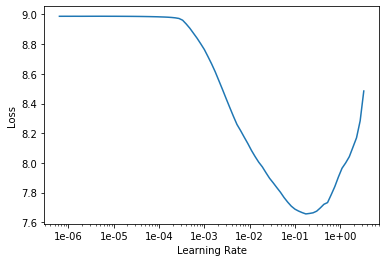

In [36]:
learn.lr_find()
learn.recorder.plot()

# Model Training

In [41]:
# Set hyperparameters
max_lr = 1e-2
moms = (0.5, .75)
pct_strt = 0.02
a_epochs=20

In [38]:
learn.fit_one_cycle(10, max_lr) #, moms=moms, pct_start = pct_strt)

epoch,train_loss,valid_loss,accuracy,time


KeyboardInterrupt: 

In [43]:
#amit experiments
# from fastai.vision import *

learn.fit_one_cycle(a_epochs, max_lr, callbacks=[callbacks.SaveModelCallback(learn, every='improvement', monitor='valid_loss', name='transformer_xl_save_model')]) #, moms=moms, pct_start = pct_strt)

epoch,train_loss,valid_loss,accuracy,time
0,2.964769,3.650502,0.395736,02:18
1,3.138553,3.638187,0.395307,02:17
2,3.130731,3.717107,0.385282,02:18
3,3.095216,3.854066,0.368470,02:17
4,3.508951,3.906379,0.363530,02:18
5,3.405083,3.856971,0.365313,02:18
6,3.046027,3.852652,0.367032,02:18
7,3.186579,3.829911,0.369599,02:17
8,3.391921,3.750638,0.383264,02:18
9,3.295695,3.725010,0.382945,02:18


Better model found at epoch 0 with valid_loss value: 3.6505024433135986.
Better model found at epoch 1 with valid_loss value: 3.6381871700286865.
Better model found at epoch 11 with valid_loss value: 3.5965895652770996.


KeyboardInterrupt: 

In [ ]:
learn.save(model_path/'awd_lstm_do_30pct')

In [12]:
learn.load(model_path/'awd_lstm_do_30pct')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (147871 items)
x: LMTextList
▁x x bo s ▁@ java . lang . override ▁public ▁void ▁on click ( android . view . view ▁v ) ▁{ ▁new ▁android . widget . number p ick er ( v . get context ()); ▁}<$ b ug $> yes,▁x x bo s ▁@ java . lang . override ▁public ▁java . lang . object ▁compute new value for left op er and ( final ▁org . b on it a soft . engine . core . operation . model . s operation ▁operation , ▁final ▁java . lang . object ▁value to set object with , ▁final ▁org . b on it a soft . engine . core . expression . control . model . s expression context ▁expression context ) ▁throws ▁org . b on it a soft . engine . core . operation . exception . s operation execution exception ▁{ ▁final ▁java . lang . string ▁data to set ▁= ▁operation . get left op er and (). get name (); ▁final ▁java . lang . object ▁object to invoke java method on ▁= ▁expression context . get input values (). get ( data to set ); ▁if ▁( object to invoke java method o

In [ ]:
learn.export(file = model_path/'awd_lstm_do_30pc.pkl')

In [ ]:
learn = load_model(df_trn, file = model_path/'awd_lstm_do_30pc.pkl')

In [ ]:
# learn.recorder.plot_losses()
figure_plot = learn.recorder.plot_losses(return_fig=True)
figure_plot.savefig(fname="transformer_xl_plot_losses.png", format='png')
from PIL import Image
Image.open('/tf/main/nbs/mdling/transformer_xl/transformer_xl_plot_losses.png')

# Model Evaluation

In [ ]:
print(df_val["query"][50000])
print("\n\n" + df_val["res"][50000])

In [ ]:
print(df_val["query"][75_000])
print("\n\n" + df_val["res"][75_000])

In [13]:
import sentencepiece as spm
sp = spm.SentencePieceProcessor()
sp.Load(str(data_path/"merged/model.model"))

True

In [ ]:
TEXT = df_val["query"][500]
N_WORDS = 200
N_SENTENCES = 2

In [ ]:
print(TEXT)
df_val["res"][500]

In [ ]:
print(sp.DecodePieces(learn.predict(TEXT, 100, temperature=0.75).split(" ")))

# Evaluation

In [ ]:
learn.predict??

In [14]:
# Grabs entire model's response up until special xxbos token,
# i.e. once model begins a new sentence we consider the model finished with its answer.
def get_res(mdl, inpt, n_toks = 1_000):
    res = mdl.predict(inpt, n_toks, temperature=0.75).split(" ")
    res = sp.DecodePieces(res).split(" ")
    try:
        end_res = res.index("xxbos")
    except:
        end_res = len(res) - 1
    
    res = " ".join(res[:end_res])[len(inpt.replace(" ", '')):]
    
    return res

In [15]:
res = get_res(learn, "public static void main() {return;}<$bug$>", n_toks = 10)
res # [0:len("public static void main() {return;}<$bug$>")]

'yes'

In [24]:
# Evaluation metrics for vulnerability detection - Accuracy, Precision, Recall
def eval_vuln(mdl, tst):
    tps, tns, fps, fns = 0, 0, 0, 0
    tot = 0
    for inpt, lbl in zip(tst["query"], tst["res"]):
        tok_len = len(sp.EncodeAsPieces(inpt))
        if tok_len > 1024:
#             print("Skipping because size is too big", tok_len)
            continue
        pred = get_res(mdl, inpt, n_toks = 10)
        if lbl == "yes":
            if pred == lbl:
                tps += 1
            else: fns += 1
        else:
            if pred == lbl:
                tns += 1
            else: fps += 1
                
        tot += 1
        torch.cuda.empty_cache()
            
    acc   = (tps + tns) / tot
    prec  = tps / (tps + fps) if (tps + fps) != 0 else 0.
    recal = tps / (tps + fns) if (tps + fns) != 0 else 0.
    
    return acc, prec, recal

In [ ]:
acc, prec, recal = eval_vuln(learn, df_val)

In [26]:
acc, prec, recal

(0.5124324324324324, 1.0, 0.5124324324324324)

In [ ]:
len(df_val[:10])

In [ ]:
import torch
torch.cuda.empty_cache()